TASK 4


In [1]:
# Cell 1 - environment & imports
# If running in Colab, uncomment the next two lines to install packages (usually preinstalled)
# !pip install -U scikit-learn pandas matplotlib joblib

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, classification_report,
    precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, precision_recall_curve
)
import joblib

# For Colab downloads (uncomment if using Colab)
# from google.colab import files


In [2]:
# Cell 2 - Load dataset and quick EDA
data = load_breast_cancer()  # sklearn built-in dataset (Breast Cancer Wisconsin)
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

print("Shape X:", X.shape)
print("Classes distribution:\n", y.value_counts())


display(X.head())


Shape X: (569, 30)
Classes distribution:
 target
1    357
0    212
Name: count, dtype: int64


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
# Cell 3 - Train/test split and scaling
RANDOM_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=RANDOM_STATE
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


os.makedirs("outputs", exist_ok=True)
joblib.dump(scaler, "outputs/scaler.joblib")


['outputs/scaler.joblib']

In [4]:
# Cell 4 - Fit Logistic Regression
clf = LogisticRegression(max_iter=1000, solver='liblinear', random_state=RANDOM_STATE)
# If classes are imbalanced, consider: LogisticRegression(class_weight='balanced', ...)
clf.fit(X_train_scaled, y_train)


joblib.dump(clf, "outputs/logistic_model.joblib")


['outputs/logistic_model.joblib']

In [5]:
# Cell 5 - Predict, evaluate (threshold=0.5)
y_proba = clf.predict_proba(X_test_scaled)[:, 1]   # probability of class 1
y_pred_default = (y_proba >= 0.5).astype(int)

# Basic metrics
cm = confusion_matrix(y_test, y_pred_default)
precision = precision_score(y_test, y_pred_default)
recall = recall_score(y_test, y_pred_default)
f1 = f1_score(y_test, y_pred_default)
roc_auc = roc_auc_score(y_test, y_proba)

print("Confusion matrix:\n", cm)
print("\nPrecision: {:.4f}".format(precision))
print("Recall:    {:.4f}".format(recall))
print("F1:        {:.4f}".format(f1))
print("ROC AUC:   {:.4f}".format(roc_auc))
print("\nClassification report:\n", classification_report(y_test, y_pred_default))


Confusion matrix:
 [[41  1]
 [ 1 71]]

Precision: 0.9861
Recall:    0.9861
F1:        0.9861
ROC AUC:   0.9957

Classification report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



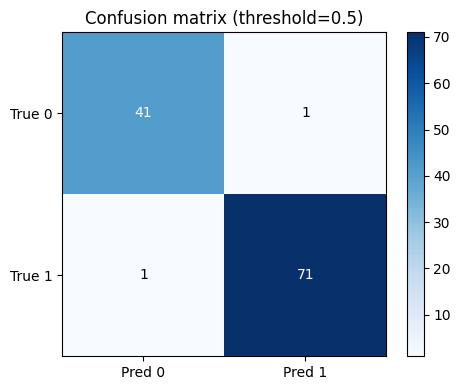

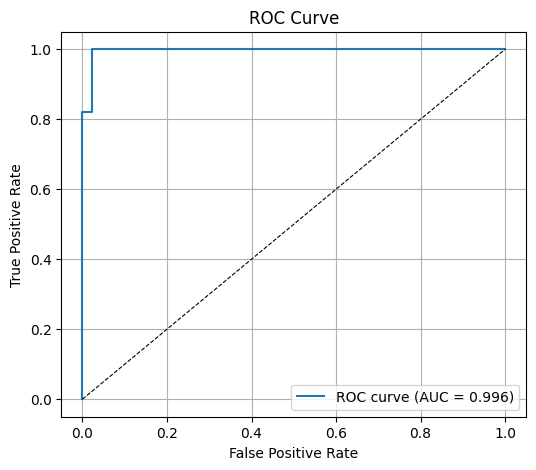

In [6]:
# Cell 6 - Plot confusion matrix and ROC curve, save figures
plt.figure(figsize=(5,4))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion matrix (threshold=0.5)")
plt.colorbar()
plt.xticks([0,1], ['Pred 0','Pred 1'])
plt.yticks([0,1], ['True 0','True 1'])
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i,j], ha="center", va="center", color="white" if cm[i,j]>cm.max()/2 else "black")
plt.tight_layout()
plt.savefig("outputs/confusion_matrix.png", dpi=150)
plt.show()

# ROC curve
fpr, tpr, roc_thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0,1],[0,1], 'k--', linewidth=0.8)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.savefig("outputs/roc_curve.png", dpi=150)
plt.show()


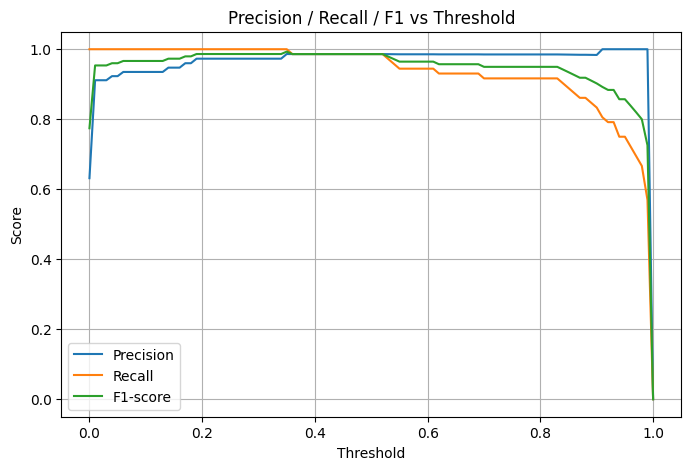

In [7]:
# Cell 7 - Threshold tuning: see how metrics change with threshold
thresholds = np.linspace(0.0, 1.0, 101)
precisions, recalls, f1s = [], [], []
for thr in thresholds:
    preds = (y_proba >= thr).astype(int)
    precisions.append(precision_score(y_test, preds, zero_division=0))
    recalls.append(recall_score(y_test, preds, zero_division=0))
    f1s.append(f1_score(y_test, preds, zero_division=0))

plt.figure(figsize=(8,5))
plt.plot(thresholds, precisions, label='Precision')
plt.plot(thresholds, recalls, label='Recall')
plt.plot(thresholds, f1s, label='F1-score')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision / Recall / F1 vs Threshold")
plt.legend()
plt.grid(True)
plt.savefig("outputs/threshold_tuning.png", dpi=150)
plt.show()


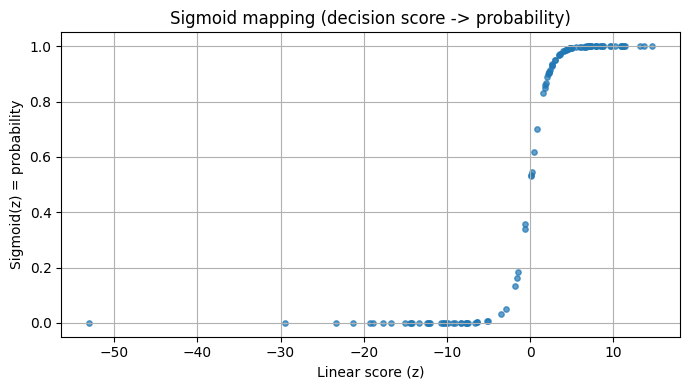

In [8]:
# Cell 8 - Sigmoid visualization (decision scores -> sigmoid)
# decision_function gives linear score z; sigmoid(z) = 1/(1+exp(-z))
try:
    z = clf.decision_function(X_test_scaled)
except Exception:
    # fallback: use log-odds of proba if decision_function not available
    z = np.log(y_proba / (1 - y_proba + 1e-12))

sigmoid = 1 / (1 + np.exp(-z))

plt.figure(figsize=(7,4))
plt.scatter(z, sigmoid, s=15, alpha=0.7)
plt.xlabel("Linear score (z)")
plt.ylabel("Sigmoid(z) = probability")
plt.title("Sigmoid mapping (decision score -> probability)")
plt.grid(True)
plt.tight_layout()
plt.savefig("outputs/sigmoid_plot.png", dpi=150)
plt.show()
